In [3]:
# Load our previously stored SMS spam classifier and associated data
load("sms_classifier.RData")

# Check quick what four quantities labeled "sms_..." have been loaded
ls()

[1] "sms_classifier"  "sms_test"        "sms_test_labels" "sms_test_pred"

In [4]:
# Load the library with Naive Bayes (otherwise "predict()" will not work)
library(e1071)

# Generate the predictions again and check
sms_test_pred2 <- predict(sms_classifier, sms_test)

# Generate a table with agreement/disagreement of the old and new predictions
table(sms_test_pred2 == sms_test_pred)


TRUE 
1390 

In [5]:
# Generate predicted probabilities
sms_test_prob <- predict(sms_classifier, sms_test, type = "raw")

# Display the first ten results
head(sms_test_prob, 10)

ham,spam
9.999996e-01,4.001744e-07
9.999922e-01,7.818488e-06
9.998554e-01,1.446003e-04
9.999614e-01,3.859165e-05
4.312258e-10,1.000000e+00
9.998517e-01,1.482769e-04
9.970297e-01,2.970327e-03
9.999916e-01,8.379059e-06
9.999937e-01,6.284639e-06
2.276919e-10,1.000000e+00


In [6]:
# Combine the results into a data frame (enough to save just "prob_spam", but we'll save both)
sms_results <- data.frame(actual_type = sms_test_labels,
                          predict_type = sms_test_pred,
                          prob_spam = round(sms_test_prob[ , 2], 5),
                          prob_ham = round(sms_test_prob[ , 1], 5)
                         )

# Display the first ten rows of the data frame
head(sms_results, 10)

,actual_type,predict_type,prob_spam,prob_ham
,<fct>,<fct>,<dbl>,<dbl>
1,ham,ham,0.00000,1.00000
2,ham,ham,0.00001,0.99999
3,ham,ham,0.00014,0.99986
4,ham,ham,0.00004,0.99996
5,spam,spam,1.00000,0.00000
6,ham,ham,0.00015,0.99985
7,ham,ham,0.00297,0.99703
8,ham,ham,0.00001,0.99999
9,ham,ham,0.00001,0.99999


In [7]:
# Load the library for the pipe operator
library(magrittr)

# Generate and display the first 10 results for which 0.4 < P(spam) < 0.6
sms_results %>%
    subset(prob_spam > 0.40 & prob_spam < 0.60) %>%
    head(10)

# Alternative command without the pipe
#head(subset(sms_results, prob_spam > 0.40 & prob_spam < 0.60), 10)

,actual_type,predict_type,prob_spam,prob_ham
,<fct>,<fct>,<dbl>,<dbl>
717,ham,spam,0.51257,0.48743
732,spam,ham,0.49833,0.50167
1311,ham,spam,0.54022,0.45978
1324,spam,spam,0.53292,0.46708


In [8]:
# Display the first 10 results where actual label and prediction disagree
sms_results %>%
    subset(actual_type != predict_type) %>%
    head(10)

# Alternative command without the pipe
#head(subset(sms_results, actual_type != predict_type), 10)

,actual_type,predict_type,prob_spam,prob_ham
,<fct>,<fct>,<dbl>,<dbl>
53,spam,ham,0.00064,0.99936
59,spam,ham,0.00354,0.99646
73,spam,ham,0.01299,0.98701
76,spam,ham,0.00622,0.99378
184,spam,ham,0.01583,0.98417
187,ham,spam,0.72218,0.27782
250,ham,spam,0.72218,0.27782
332,spam,ham,0.00001,0.99999
357,spam,ham,0.37108,0.62892


In [9]:
# Generate the confusion matrix using "table()"
table(sms_results$actual_type, sms_results$predict_type, dnn = c("Actual", "Predicted"))

# Load the library (after running "install.packages("gmodels")")
library(gmodels)

# Generate the confusion matrix using "CrossTable()"
CrossTable(sms_results$actual_type, sms_results$predict_type, dnn = c("Actual", "Predicted"), prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE, prop.t = TRUE)

      Predicted
Actual  ham spam
  ham  1201    6
  spam   30  153


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1390 

 
             | Predicted 
      Actual |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |      1201 |         6 |      1207 | 
             |     0.864 |     0.004 |           | 
-------------|-----------|-----------|-----------|
        spam |        30 |       153 |       183 | 
             |     0.022 |     0.110 |           | 
-------------|-----------|-----------|-----------|
Column Total |      1231 |       159 |      1390 | 
-------------|-----------|-----------|-----------|

 


In [1]:
# install.packages("caret")
library(caret)

# Generate the confusion matrix
#confusionMatrix(data = sms_results$predict_type, reference = sms_results$actual_type, positive = "spam")
confusionMatrix(data = as.factor( c("no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes")), reference = as.factor(c("yes","yes","yes","yes","yes","yes","yes","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","no","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes","yes")), positive = "yes")


Loading required package: ggplot2

Loading required package: lattice



Confusion Matrix and Statistics

          Reference
Prediction no yes
       no  37   7
       yes 30  26
                                          
               Accuracy : 0.63            
                 95% CI : (0.5276, 0.7244)
    No Information Rate : 0.67            
    P-Value [Acc > NIR] : 0.8310080       
                                          
                  Kappa : 0.289           
                                          
 Mcnemar's Test P-Value : 0.0002983       
                                          
            Sensitivity : 0.7879          
            Specificity : 0.5522          
         Pos Pred Value : 0.4643          
         Neg Pred Value : 0.8409          
             Prevalence : 0.3300          
         Detection Rate : 0.2600          
   Detection Prevalence : 0.5600          
      Balanced Accuracy : 0.6701          
                                          
       'Positive' Class : yes             
                                 

# install.packages("vcd")
library(vcd)

# Compute the kappa statistic using "Kappa()" from "vcd"
Kappa(table(sms_results$actual_type, sms_results$predict_type))

In [15]:
# install.packages("irr")
library(irr)

# Compute the kappa statistic using "kappa2()" from "irr"
kappa2(sms_results[1:2])

 Cohen's Kappa for 2 Raters (Weights: unweighted)

 Subjects = 1390 
   Raters = 2 
    Kappa = 0.88 

        z = 32.9 
  p-value = 0 

Setting levels: control = ham, case = spam

Setting direction: controls < cases



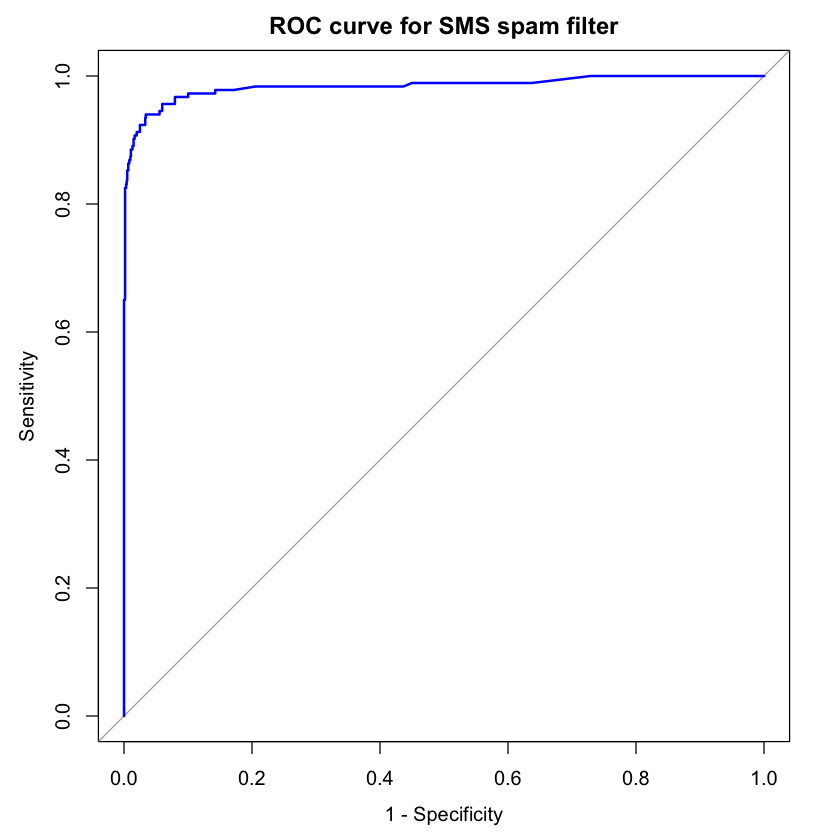

In [18]:
# install.packages("pROC")
library(pROC)

# Build a "roc" object that can be plotted or analyzed in other ways
sms_roc <- roc(response = sms_results$actual_type, predictor = sms_results$prob_spam)

# Plot the ROC curve
plot(sms_roc, main = "ROC curve for SMS spam filter", col = "blue", lwd = 2, legacy.axes = TRUE)

In [19]:
# Display the "auc" generated as part of "sms_roc"
sms_roc$auc

# Use the function "auc"
auc(sms_roc)

Area under the curve: 0.984

Area under the curve: 0.984